In [1]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 952kB 5.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=68c175e6c041faed6d35eebce5a2e319db441d654d298004f54b5cb40a3824c1
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Triangular Wave Plot
Plot for Learning Rate Variation across multiple cycles in case of triangular mode

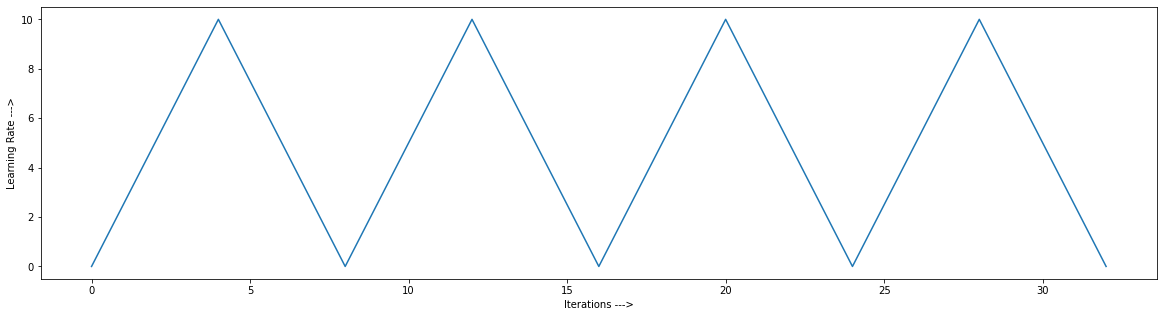

In [13]:
import numpy as np  
import matplotlib.pyplot as plt  

plt.figure(figsize=(20,5))

def plot(formula, x_range,amp=5):  
    x = x_range
    y= [formula(i) for i in x]
    plt.ylabel("Learning Rate --->")
    plt.xlabel("Iterations --->") 
    plt.plot(x, y)  
    plt.show()  

def triangular_plot(x,stepsize=5,lr_max=10):
    slope=lr_max/(stepsize-1)
    if x in range(0,stepsize*2-1):
      if x in range(0,stepsize):
        return slope*x
      else:
        return triangular_plot((stepsize-1)-((x+1)%stepsize),stepsize,lr_max)
    else:
      return triangular_plot(x%(2*(stepsize-1)))
plot(triangular_plot, range(0,33))

## Cloning Git Repo

In [ ]:
!git clone "https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments.git"

Cloning into 'TheSchoolOfAI-EVA5-Assignments'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 489 (delta 140), reused 103 (delta 38), pack-reused 209
Receiving objects: 100% (489/489), 11.85 MiB | 36.55 MiB/s, done.
Resolving deltas: 100% (196/196), done.


In [ ]:
%cd "TheSchoolOfAI-EVA5-Assignments/Assignment 11/src"

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 11/src


## Loading CIFAR-10 Data 

In [ ]:
from data_loader import ImageDataLoader
from data_transform import CIFAR10Transforms
import albumentations as A

In [ ]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [A.PadIfNeeded(min_height=40,min_width=40), 
                     A.RandomCrop(32, 32, p=1.0),
                     A.HorizontalFlip(),
                     A.Cutout(num_holes=2, max_h_size=8, max_w_size=8, fill_value=0, always_apply=False, p=0.1),
                     ]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 512, True, 'CIFAR10', figure_size=(20,10))

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to data/cifar-10-python.tar.gz


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Taking a look at the data

#### Train data

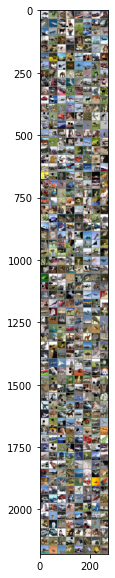

In [ ]:
image_loader.show(dataset_type='train')

#### Test Data

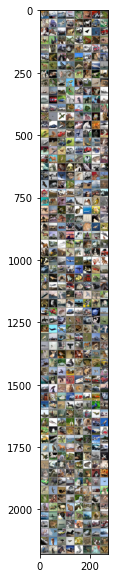

In [ ]:
image_loader.show(dataset_type='test')

## Importing Our Custom ResNet Architecture  


New ResNet Architecture for Cifar10:

1. PrepLayer - Conv 3x3 s1, p1) >> BN >> RELU [64k]
2. Layer1 -
   -  X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [128k]
   - R1 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [128k] 
   - Add(X, R1)
3. Layer 2 -
   - Conv 3x3 [256k]
   - MaxPooling2D
   - BN
   - ReLU
4. Layer 3 -
   - X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [512k]
   - R2 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [512k]
   - Add(X, R2)
5. MaxPooling with Kernel Size 4
6. FC Layer 
7. SoftMax




In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from cnn_models import CustomResNet
from learner import Learner

In [ ]:
criterion = F.nll_loss
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=CustomResNet(),loss_func=criterion)

### Model Summary

In [ ]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

## Finding the Learning rates

In [ ]:
import torch
import torch.optim as optim
from lr_finder import LRFinder

### lr_min

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.43E-03


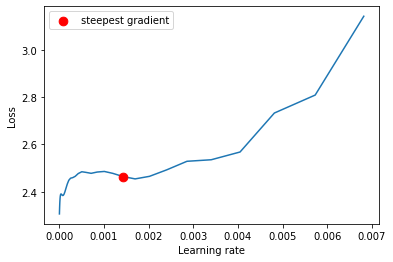

In [ ]:
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-7, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(train_loader=image_loader.train_loader, val_loader=image_loader.test_loader, end_lr=3, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

### lr_max

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.66E-01


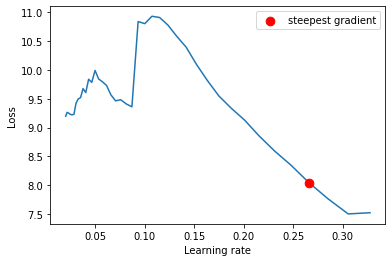

In [ ]:
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-2, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(image_loader.train_loader, end_lr=10, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

## Training

We train the model for 20 epochs using one cycle policy.
Eaxh epoch has 98 steps(iterations).
To achieve max_lr at step 5 we need 98*5=490 iterations.
rest of the 15 epochs comprise of 1470 iterations.

In [ ]:
lr_max= 2
lr_min = 1.43E-03
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=0.01, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=490, step_size_down=1470)

In [ ]:
cnn_learner.fit_custom(20,optimizer,lr_scheduler,pass_loss=False)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3056331872940063 Batch_id=97 Accuracy=41.87: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2632, Accuracy: 5448/10000 (54.48%)

EPOCH: 1


Loss=0.985016942024231 Batch_id=97 Accuracy=52.36: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3036, Accuracy: 5745/10000 (57.45%)

EPOCH: 2


Loss=1.0024456977844238 Batch_id=97 Accuracy=60.64: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8836, Accuracy: 6924/10000 (69.24%)

EPOCH: 3


Loss=0.7162793278694153 Batch_id=97 Accuracy=68.73: 100%|██████████| 98/98 [00:25<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8771, Accuracy: 7013/10000 (70.13%)

EPOCH: 4


Loss=0.8631029725074768 Batch_id=97 Accuracy=71.60: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2558, Accuracy: 6476/10000 (64.76%)

EPOCH: 5


Loss=0.8125078082084656 Batch_id=97 Accuracy=73.69: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7439, Accuracy: 7501/10000 (75.01%)

EPOCH: 6


Loss=0.7029066681861877 Batch_id=97 Accuracy=76.98: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7223, Accuracy: 7836/10000 (78.36%)

EPOCH: 7


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5201, Accuracy: 8299/10000 (82.99%)

EPOCH: 8


Loss=0.6317905783653259 Batch_id=97 Accuracy=82.29: 100%|██████████| 98/98 [00:24<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6102, Accuracy: 8141/10000 (81.41%)

EPOCH: 9


Loss=0.4615877568721771 Batch_id=97 Accuracy=83.21: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7093, Accuracy: 8020/10000 (80.20%)

EPOCH: 10


Loss=0.4029863774776459 Batch_id=97 Accuracy=82.93: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6203, Accuracy: 8188/10000 (81.88%)

EPOCH: 11


Loss=0.6716858744621277 Batch_id=97 Accuracy=83.97: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5893, Accuracy: 8252/10000 (82.52%)

EPOCH: 12


Loss=0.34544652700424194 Batch_id=97 Accuracy=84.81: 100%|██████████| 98/98 [00:25<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4628, Accuracy: 8518/10000 (85.18%)

EPOCH: 13


Loss=0.4882652163505554 Batch_id=97 Accuracy=87.94: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4783, Accuracy: 8497/10000 (84.97%)

EPOCH: 14


Loss=0.34332603216171265 Batch_id=97 Accuracy=86.89: 100%|██████████| 98/98 [00:25<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5079, Accuracy: 8478/10000 (84.78%)

EPOCH: 15


Loss=0.3039747178554535 Batch_id=97 Accuracy=87.89: 100%|██████████| 98/98 [00:25<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5024, Accuracy: 8569/10000 (85.69%)

EPOCH: 16


Loss=0.358421266078949 Batch_id=97 Accuracy=88.49: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4938, Accuracy: 8475/10000 (84.75%)

EPOCH: 17


Loss=0.26079830527305603 Batch_id=97 Accuracy=89.56: 100%|██████████| 98/98 [00:24<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4244, Accuracy: 8755/10000 (87.55%)

EPOCH: 18


Loss=0.34438052773475647 Batch_id=97 Accuracy=90.09: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4062, Accuracy: 8760/10000 (87.60%)

EPOCH: 19


Loss=0.3675997257232666 Batch_id=97 Accuracy=88.86: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]



Test set: Average loss: 0.4580, Accuracy: 8668/10000 (86.68%)



### Annihilation
Finding the learning rate to annihliate the last 4 epochs

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 9.33E-03


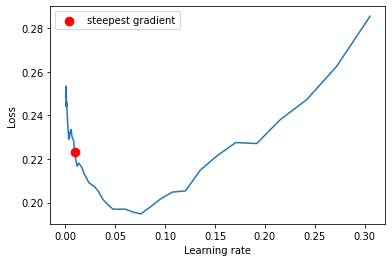

In [ ]:
from lr_finder import LRFinder

optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-4, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(image_loader.train_loader, end_lr=10, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer=optim.SGD(cnn_learner.model.parameters(), lr=9.33E-03, momentum=0.9, weight_decay=cnn_learner.weight_decay)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
cnn_learner.fit_custom(4, optimizer, scheduler, pass_loss=False)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.166413813829422 Batch_id=97 Accuracy=94.10: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3089, Accuracy: 9067/10000 (90.67%)

EPOCH: 1


Loss=0.10223869979381561 Batch_id=97 Accuracy=95.12: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3020, Accuracy: 9092/10000 (90.92%)

EPOCH: 2


Loss=0.11056280136108398 Batch_id=97 Accuracy=95.60: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3024, Accuracy: 9109/10000 (91.09%)

EPOCH: 3


Loss=0.1426948755979538 Batch_id=97 Accuracy=96.06: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]



Test set: Average loss: 0.3029, Accuracy: 9118/10000 (91.18%)



#### Plot Losses and Accuracy(Train and Test)

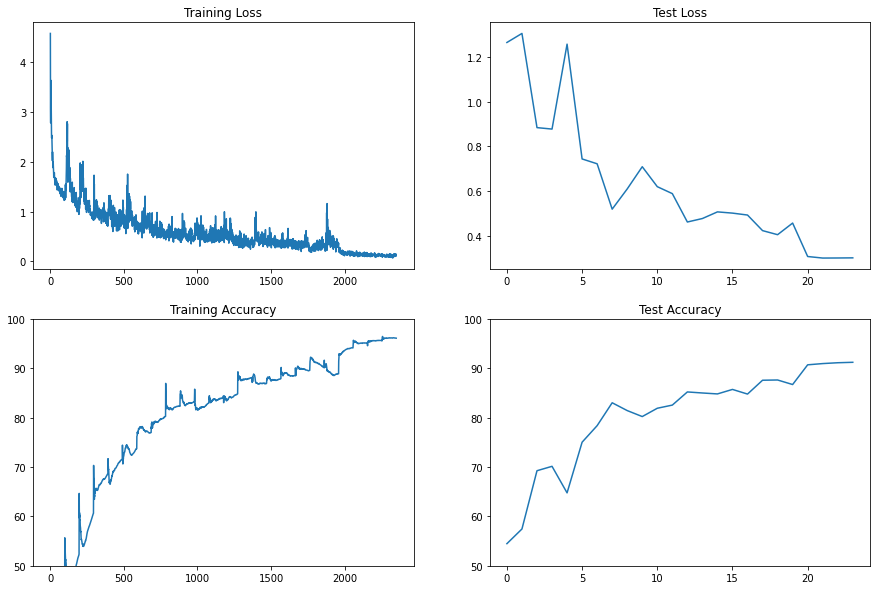

In [ ]:
cnn_learner.plot_losses()

## Interpreting the Learner on Test Data

In [ ]:
from interpreter import Interpreter

In [ ]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 11/src/interpreter.py:39: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = ((predicted == labels) == False).nonzero()


#### Confusion Matrix

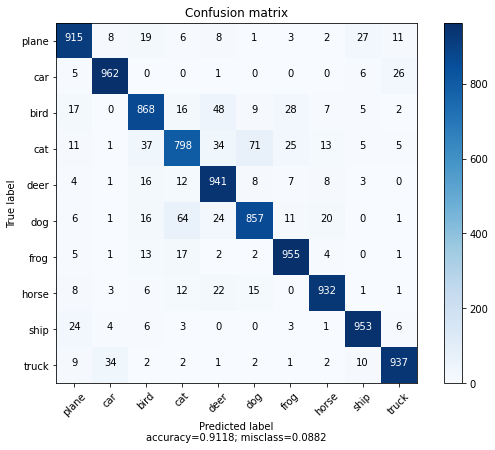

In [ ]:
intrepret.plot_confusion_matrix()

#### Performance Metrics
Here we see the Precision, Recall, F1-Score

In [ ]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.883011,0.8680,0.875441,1000.0000
car,0.947783,0.9620,0.954839,1000.0000
bird,0.858065,0.7980,0.826943,1000.0000
cat,0.870490,0.9410,0.904373,1000.0000
deer,0.888083,0.8570,0.872265,1000.0000
dog,0.924492,0.9550,0.939498,1000.0000
frog,0.942366,0.9320,0.937154,1000.0000
horse,0.911355,0.9150,0.913174,1000.0000
ship,0.943564,0.9530,0.948259,1000.0000
truck,0.946465,0.9370,0.941709,1000.0000
